In [3]:
import numpy as np ; import matplotlib.pyplot as plt

In [4]:
def brooks_corey_rel_perm_fun(Sw, Swr, Snwr, krw0, krnw0, m):
    Se = (Sw - Swr)/((1 - Snwr) - Swr)
    krw = krw0*Se**(2/m + 3)                       # 01
    krnw = krnw0*(1-Se)**2*(1-Se**(2/m + 1))       # 02  
    return krw, krnw

In [5]:
def mod_brooks_corey_rel_perm_fun(Sw, Swr, Snwr, krw0, krnw0, nw, nnw):
    Se = (Sw - Swr)/((1 - Snwr) - Swr)
    krw = krw0*Se**nw
    krnw = krnw0*(1-Se)**nnw
    return krw, krnw

(0.001, 1)

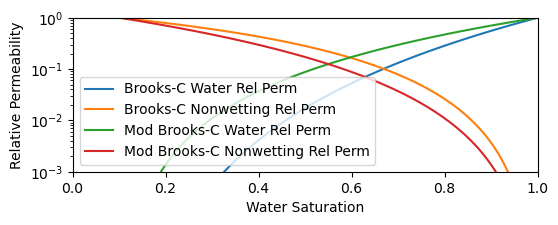

In [6]:
Swr = 0.1 ; Snwr = 0 ;          Sw = np.linspace((Swr + 0.001), (1 - Snwr - 0.001), num=100)
krw0 = 1  ; krnw0 = 1

krw_bc, krnw_bc   = brooks_corey_rel_perm_fun     (Sw, Swr, Snwr, krw0, krnw0, 1)     # 01 , 02
krw_mbc, krnw_mbc = mod_brooks_corey_rel_perm_fun (Sw, Swr, Snwr, krw0, krnw0, 3, 3)  # 03 , 04 ___________
plt.figure(figsize=(6, 2), dpi=100) 
plt.plot(Sw, krw_bc,       label = 'Brooks-C Water Rel Perm') ; 
plt.plot(Sw, krnw_bc,      label = 'Brooks-C Nonwetting Rel Perm')

plt.plot(Sw, krw_mbc,      label = 'Mod Brooks-C Water Rel Perm'); 
plt.plot(Sw, krnw_mbc,     label = 'Mod Brooks-C Nonwetting Rel Perm')
plt.xlabel('Water Saturation') ; plt.ylabel('Relative Permeability') ; plt.legend() ; plt.xlim(0, 1) ; plt.yscale('log')  ;   plt.ylim(0.001, 1) 

### **Burdine's __ `Relative Permeability from Capillary Pressure`**

In [7]:
def brooks_corey_pc(Sw, Swr, Snwr, Pc_entry, m):
    Se = (Sw - Swr)/((1 - Snwr) - Swr)
    Pc = Pc_entry*(Se**(-1/m))
    return Pc

Text(0, 0.5, 'Capillary Pressure (kPa)')

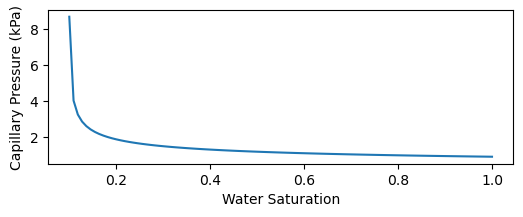

In [9]:
Swr = 0.1   ; Snwr = 0   ;   Sw = np.linspace((Swr + 0.001), (1 - Snwr - 0.001), num=100)  ; m_bc = 3  ; Pc_entry_bc = 0.9
Pc_bc = brooks_corey_pc(Sw, Swr, Snwr, Pc_entry_bc, m_bc)
plt.figure(figsize=(6, 2), dpi=100) ; plt.plot(Sw, Pc_bc) ; plt.xlabel('Water Saturation') ; plt.ylabel('Capillary Pressure (kPa)')

Now define a function that takes in water saturation and capillary pressure and calculates wetting and nonwetting relative permeability using Burdine's method. The full equations for this are given in the relative permeability section of chapter 3 of the course notes.

In [14]:
def burdine_fun(Sw, Swr, Snwr, Pc):
    Se = (Sw-Swr)/((1-Snwr)-Swr)  ; denom = np.trapz(1/Pc**2,Sw)  ; krw_burdine = np.zeros(np.shape(Sw))  ; krnw_burdine = np.zeros(np.shape(Sw))
    
    for i in range(len(Sw)-1,0,-1):
        kw_numer = 1/Pc[:i]**2      ; krw_burdine[i]  =  Se[i]   **2*np.trapz(kw_numer, Sw[:i]) / denom
    
    for i in range(len(Sw)):
        knw_numer = 1/Pc[i:]**2     ; krnw_burdine[i] = (1-Se[i])**2*np.trapz(knw_numer, Sw[i:]) / denom
    
    return krw_burdine, krnw_burdine

Now let's see if this works by calculating the Brooks-Corey relative permeability using the same ```m``` as we used for defining capillary pressure (```Pc_bc```).

[0.101      0.11007071 0.11914141 0.12821212 0.13728283 0.14635354
 0.15542424 0.16449495 0.17356566 0.18263636 0.19170707 0.20077778
 0.20984848 0.21891919 0.2279899  0.23706061 0.24613131 0.25520202
 0.26427273 0.27334343 0.28241414 0.29148485 0.30055556 0.30962626
 0.31869697 0.32776768 0.33683838 0.34590909 0.3549798  0.36405051
 0.37312121 0.38219192 0.39126263 0.40033333 0.40940404 0.41847475
 0.42754545 0.43661616 0.44568687 0.45475758 0.46382828 0.47289899
 0.4819697  0.4910404  0.50011111 0.50918182 0.51825253 0.52732323
 0.53639394 0.54546465 0.55453535 0.56360606 0.57267677 0.58174747
 0.59081818 0.59988889 0.6089596  0.6180303  0.62710101 0.63617172
 0.64524242 0.65431313 0.66338384 0.67245455 0.68152525 0.69059596
 0.69966667 0.70873737 0.71780808 0.72687879 0.73594949 0.7450202
 0.75409091 0.76316162 0.77223232 0.78130303 0.79037374 0.79944444
 0.80851515 0.81758586 0.82665657 0.83572727 0.84479798 0.85386869
 0.86293939 0.8720101  0.88108081 0.89015152 0.89922222 0.90829

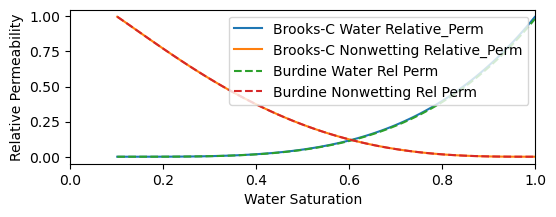

In [16]:
krw_bc, krnw_bc           = brooks_corey_rel_perm_fun  (Sw, Swr, Snwr, krw0, krnw0, m_bc)
krw_burdine, krnw_burdine = burdine_fun                (Sw, Swr, Snwr, Pc_bc)

plt.figure(figsize=(6, 2), dpi=100); 
plt.plot(Sw, krw_bc, label='Brooks-C Water Relative_Perm')                  ; plt.plot(Sw, krnw_bc, label='Brooks-C Nonwetting Relative_Perm')
plt.plot(Sw, krw_burdine,  '--', label='Burdine Water Rel. Perm')     ; plt.plot(Sw, krnw_burdine, '--', label='Burdine Nonwetting Rel. Perm')

plt.xlabel('Water Saturation') ; plt.ylabel('Relative Permeability') ; plt.legend() ; plt.xlim(0, 1)  ; print(Sw)

**Pretty cool, right?! - Indeed!**

### **..relative permeability from capillary pressure**

##### Now, using the capillary pressure function that you fit to the capillary pressure data in the [Capillary Pressure Curves notebook](https://github.com/zahasky/Contaminant-Hydrogeology-Activities/blob/master/Capillary%20Pressure%20Curves.ipynb), calculate the corresponding relative permeability curves using Burdine's Method.